병원데이터 클린징

In [1]:
#라이브러리 불러오기
import pandas as pd 

#파일경로를 찾고 변수 file_path에 저장
file_path= './data/hospital_all.xlsx'

#read_excel()함수로 데이터프레임 변환 
df1 = pd.read_excel(file_path)


#데이터프레임 출력
df1

,요양기관명,시도코드,시도코드명,우편번호,주소,전화번호,병원홈페이지
0,가톨릭대학교인천성모병원,220000,인천,21431,인천광역시 부평구 동수로 56 (부평동),032-1544-9004,http://www.cmcism.or.kr/
1,강릉아산병원,320000,강원,25440,강원도 강릉시 사천면 방동길 38 (),033-610-3114,http://www.gnah.co.kr
2,강북삼성병원,110000,서울,3181,서울특별시 종로구 새문안로 29 (평동),02-2001-2001,http://www.kbsmc.co.kr
3,건국대학교병원,110000,서울,5030,서울특별시 광진구 능동로 120-1 (화양동),1588-1533,http://www.kuh.ac.kr
4,경북대학교병원,230000,대구,41944,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)",053-200-5114,http://knumc.knu.ac.kr
...,...,...,...,...,...,...,...
76598,힘나는한의원,310000,경기,10099,경기도 김포시 걸포2로 21 302호 (걸포동),031-997-1750,NaN
76599,힘내라한의원,110000,서울,7526,서울특별시 강서구 화곡로 429 토피아 401호 (가양동),02-6952-8277,NaN
76600,힘찬마디한의원,110000,서울,5329,서울특별시 강동구 천호대로 1027 3층 (천호동),02-401-7713,NaN
76601,힘찬세상경희한의원,110000,서울,4376,"서울특별시 용산구 한강대로 109 (한강로2가, 용성비즈텔)",02-793-2080,http://www.himhani.com


In [2]:
# 결측데이터 확인
df1.isnull( )

,요양기관명,시도코드,시도코드명,우편번호,주소,전화번호,병원홈페이지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
76598,False,False,False,False,False,False,True
76599,False,False,False,False,False,False,True
76600,False,False,False,False,False,False,True
76601,False,False,False,False,False,False,False


In [3]:
df1.notnull()

,요양기관명,시도코드,시도코드명,우편번호,주소,전화번호,병원홈페이지
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
76598,True,True,True,True,True,True,False
76599,True,True,True,True,True,True,False
76600,True,True,True,True,True,True,False
76601,True,True,True,True,True,True,True


In [4]:
# 결측값 개수
df1.isnull().sum()

요양기관명         0
시도코드          0
시도코드명         0
우편번호          0
주소            0
전화번호        370
병원홈페이지    67761
dtype: int64

In [5]:
# 행(지역별) 단위 결측값 개수
df1.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
76598    1
76599    1
76600    1
76601    0
76602    0
Length: 76603, dtype: int64

In [6]:
# 행단위 실제값 개수
df1.notnull().sum(1)

0        7
1        7
2        7
3        7
4        7
        ..
76598    6
76599    6
76600    6
76601    7
76602    7
Length: 76603, dtype: int64

In [7]:
#결측치가 있는 전체 행 제거
df_drop_allrow = df1.dropna(axis=0)
df_drop_allrow

,요양기관명,시도코드,시도코드명,우편번호,주소,전화번호,병원홈페이지
0,가톨릭대학교인천성모병원,220000,인천,21431,인천광역시 부평구 동수로 56 (부평동),032-1544-9004,http://www.cmcism.or.kr/
1,강릉아산병원,320000,강원,25440,강원도 강릉시 사천면 방동길 38 (),033-610-3114,http://www.gnah.co.kr
2,강북삼성병원,110000,서울,3181,서울특별시 종로구 새문안로 29 (평동),02-2001-2001,http://www.kbsmc.co.kr
3,건국대학교병원,110000,서울,5030,서울특별시 광진구 능동로 120-1 (화양동),1588-1533,http://www.kuh.ac.kr
4,경북대학교병원,230000,대구,41944,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)",053-200-5114,http://knumc.knu.ac.kr
...,...,...,...,...,...,...,...
76559,휴한의원,310000,경기,16571,"경기도 수원시 권선구 권광로 145 207~209호 (권선동, 이오스오피스텔)",031-297-1075,http://www.hyoomedical.com/
76569,흐를류한의원,310000,경기,10464,"경기도 고양시 덕양구 고양대로 1387 305,306,307호 (성사동, 성원코아)",031-966-1075,http://www.sunhwan.com
76579,흥시윤한의원,380000,경남,51198,"경상남도 창원시 의창구 읍성로 71 원창상가 5층 501,502,503호 (소답동)",055-297-8278,http://www.bondiol.co.kr/
76601,힘찬세상경희한의원,110000,서울,4376,"서울특별시 용산구 한강대로 109 (한강로2가, 용성비즈텔)",02-793-2080,http://www.himhani.com


In [8]:
#결측치가 있는 전체 열 제거
df_drop_allcolumn = df1.dropna(axis=1)
df_drop_allcolumn

,요양기관명,시도코드,시도코드명,우편번호,주소
0,가톨릭대학교인천성모병원,220000,인천,21431,인천광역시 부평구 동수로 56 (부평동)
1,강릉아산병원,320000,강원,25440,강원도 강릉시 사천면 방동길 38 ()
2,강북삼성병원,110000,서울,3181,서울특별시 종로구 새문안로 29 (평동)
3,건국대학교병원,110000,서울,5030,서울특별시 광진구 능동로 120-1 (화양동)
4,경북대학교병원,230000,대구,41944,"대구광역시 중구 동덕로 130 (삼덕동2가, 경북대학교병원)"
...,...,...,...,...,...
76598,힘나는한의원,310000,경기,10099,경기도 김포시 걸포2로 21 302호 (걸포동)
76599,힘내라한의원,110000,서울,7526,서울특별시 강서구 화곡로 429 토피아 401호 (가양동)
76600,힘찬마디한의원,110000,서울,5329,서울특별시 강동구 천호대로 1027 3층 (천호동)
76601,힘찬세상경희한의원,110000,서울,4376,"서울특별시 용산구 한강대로 109 (한강로2가, 용성비즈텔)"


In [9]:
df_drop_allcolumn = df1.drop(labels='요양기관명', axis=1)
df_drop_allcolumn = df_drop_allcolumn.drop(labels='시도코드', axis=1)
df_drop_allcolumn = df_drop_allcolumn.drop(labels='우편번호', axis=1)
df_drop_allcolumn = df_drop_allcolumn.drop(labels='주소', axis=1)
df_drop_allcolumn

,시도코드명,전화번호,병원홈페이지
0,인천,032-1544-9004,http://www.cmcism.or.kr/
1,강원,033-610-3114,http://www.gnah.co.kr
2,서울,02-2001-2001,http://www.kbsmc.co.kr
3,서울,1588-1533,http://www.kuh.ac.kr
4,대구,053-200-5114,http://knumc.knu.ac.kr
...,...,...,...
76598,경기,031-997-1750,NaN
76599,서울,02-6952-8277,NaN
76600,서울,02-401-7713,NaN
76601,서울,02-793-2080,http://www.himhani.com


In [10]:
df_drop_allcolumn = df_drop_allcolumn.drop(labels='전화번호', axis=1)
df_drop_allcolumn = df_drop_allcolumn.drop(labels='병원홈페이지', axis=1)
df_drop_allcolumn

,시도코드명
0,인천
1,강원
2,서울
3,서울
4,대구
...,...
76598,경기
76599,서울
76600,서울
76601,서울


In [11]:
df2 = df_drop_allcolumn.groupby(['시도코드명']).sum()
df2

""
시도코드명
강원
경기
경남
경북
광주
대구
대전
부산
서울


In [17]:

import pandas as pd

data = {
    '지역별': ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북','전체'],
    '전체 병원 수': [1942, 17081, 4202, 3411, 2296, 4007, 2333, 5501, 18717, 445, 1416, 3685, 2642, 2919, 1018, 2789, 2199, 76603],
    '응급의료기관수': [22, 67, 37, 31, 20, 16, 10, 28, 51, 2, 7, 19, 37, 20, 6, 17, 15, 405]
    
}

df3 = pd.DataFrame(data)
df3

,지역별,전체 병원 수,응급의료기관수
0,강원,1942,22
1,경기,17081,67
2,경남,4202,37
3,경북,3411,31
4,광주,2296,20
5,대구,4007,16
6,대전,2333,10
7,부산,5501,28
8,서울,18717,51
9,세종,445,2


In [18]:
df3['백분율'] = (df3['응급의료기관수'] / df3['전체 병원 수']) * 100
df3

,지역별,전체 병원 수,응급의료기관수,백분율
0,강원,1942,22,1.132853
1,경기,17081,67,0.392249
2,경남,4202,37,0.880533
3,경북,3411,31,0.908824
4,광주,2296,20,0.871080
5,대구,4007,16,0.399301
6,대전,2333,10,0.428633
7,부산,5501,28,0.508998
8,서울,18717,51,0.272480
9,세종,445,2,0.449438


In [20]:
df4 = df3.drop(labels='전체 병원 수', axis=1)
df4 = df4.drop(labels='응급의료기관수', axis=1)
df4

,지역별,백분율
0,강원,1.132853
1,경기,0.392249
2,경남,0.880533
3,경북,0.908824
4,광주,0.871080
5,대구,0.399301
6,대전,0.428633
7,부산,0.508998
8,서울,0.272480
9,세종,0.449438


In [21]:

# 데이터 분배
df_region1 = df4[df4['지역별'].isin(['서울', '경기', '부산', '대구', '인천', '광주', '대전', '울산', '세종'])]

df_region2 = df4[df4['지역별'].isin(['강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '전체'])]

# 데이터 1 재정렬
order_data1 = ['서울', '경기', '부산', '대구', '인천', '광주', '대전', '울산', '세종']
df_region1_reordered = df_region1.set_index('지역별').reindex(order_data1).reset_index()

# 데이터 2 재정렬
order_data2 = ['강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '전체']
df_region2_reordered = df_region2.set_index('지역별').reindex(order_data2).reset_index()

print("지역별 데이터 1:\n", df_region1_reordered)
print("지역별 데이터 2:\n", df_region2_reordered)


지역별 데이터 1:
   지역별       백분율
0  서울  0.272480
1  경기  0.392249
2  부산  0.508998
3  대구  0.399301
4  인천  0.515604
5  광주  0.871080
6  대전  0.428633
7  울산  0.494350
8  세종  0.449438
지역별 데이터 2:
   지역별       백분율
0  강원  1.132853
1  충북  0.682128
2  충남  0.609537
3  전북  0.685166
4  전남  1.400454
5  경북  0.908824
6  경남  0.880533
7  제주  0.589391
8  전체  0.528700


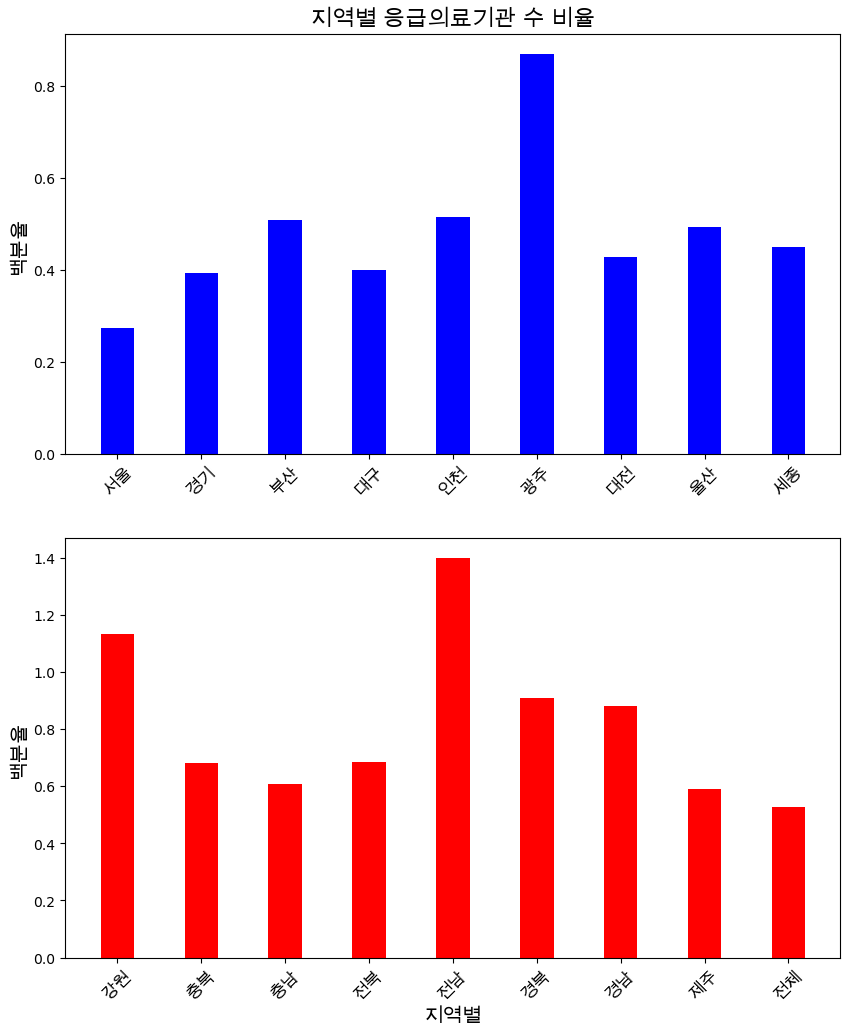

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = '/Library/Fonts/Arial Unicode.ttf'  # 사용하고자 하는 한글 폰트 파일 경로로 수정해주세요.

# 폰트 설정
fontprop = fm.FontProperties(fname=font_path)

labels1 = df_region1_reordered['지역별']
percentages1 = df_region1_reordered['백분율']

labels2 = df_region2_reordered['지역별']
percentages2 = df_region2_reordered['백분율']

width = 0.4
x1 = np.arange(len(labels1))
x2 = np.arange(len(labels2))

fig, axs = plt.subplots(2, 1, figsize=(10, 12))
axs[0].bar(x1, percentages1, width, label='서울, 경기도, 부산, 대구, 인천, 광주, 대전, 울산, 세종', color='b')
axs[1].bar(x2, percentages2, width, label='강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주, 전체', color='r')

axs[0].set_title('지역별 응급의료기관 수 비율',fontproperties=fontprop, fontsize=16)
axs[1].set_xlabel('지역별',fontproperties=fontprop, fontsize=14)
axs[0].set_ylabel('백분율',fontproperties=fontprop, fontsize=14)
axs[1].set_ylabel('백분율',fontproperties=fontprop, fontsize=14)



axs[0].set_xticks(x1)
axs[0].set_xticklabels(labels1, fontproperties=fontprop, rotation=45, fontsize=12)
axs[1].set_xticks(x2)
axs[1].set_xticklabels(labels2, fontproperties=fontprop, rotation=45, fontsize=12)

plt.show()
